# Find the tasks within an AEZ boundary

These will be published to the AWS SQS to constrain which tiles are run

In [1]:
import json
import pandas as pd
import geopandas as gpd
from datacube.utils.geometry import Geometry
from odc.dscache.tools.tiling import GRIDS

/env/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.7.2-CAPI-1.11.0 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Analysis Parameters

In [2]:
aez='../testing/eastern_cropmask/data/Eastern.geojson'
tasks = 'gm_s2_semiannual_all.csv'
resolution = '10'

### open the aez geojson

{'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::6933'}}


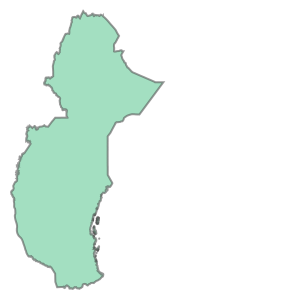

In [3]:
with open(aez) as fh:
    data = json.load(fh)

print(data['crs'])
geom = Geometry(data['features'][0]['geometry'], crs='epsg:6933')
geom

### Open the tasks dataframe

In [6]:
task_df = pd.read_csv(tasks)
task_df.head()

,T,X,Y,datasets,days
0,2019--P1Y,153,98,2,2
1,2019--P1Y,153,99,2,2
2,2019--P1Y,153,100,2,2
3,2019--P1Y,154,95,2,2
4,2019--P1Y,154,96,2,2


### Open the GRIDS dataset at required resolution

In [7]:
africa10 = GRIDS['africa_'+resolution]
africa10

GridSpec(crs=epsg:6933, tile_size=(96000.0, 96000.0), resolution=(-10, 10))

## Find the tiles which overlap AEZ

In [8]:
aez_tasks = []
for row in task_df.itertuples():
    tmp_geom = africa10.tile_geobox((row.X, row.Y)).extent
    if geom.contains(tmp_geom) or geom.overlaps(tmp_geom):
        aez_tasks.append(row)

In [9]:
len(aez_tasks)

390

In [ ]:
aez_tasks[0]